# Covid_19 Analysis

Wenjie Chen: http://jackchen96.github.io/

Jackchen96

## Abstract

First, we load the data and have a rough look at it. <br/> I found that there are 111 unique countries/regions and 183 unique province/state are affected by the disease. There are 80906 confirmed cases in Mainland China and 30698 confirmed cases outside China. 


Next, I do an analysis in the cases in Mainland China. I load the data from "time-series-confirmed". Summarize the confirmed case in China.<br/>
I write two model that may be used to match the trend. One is exponential model and one is sigmoid model. In the trend of China case, I found that the head of the trend is completly exponential, but the tail of the trend is slightly changing to sigmoid model. So I put a exponential line on the data plot and do a prediction. But I guess the trend may be turning to sigmoid in the future. If more data and more time is given, a complicated model is necessary.


Then, I do an analysis in the cases in all provinces/regions in Mainland China. Hubei absolutely has the most confirmed cases. And I find that the death/rocovery rate is roughly at 1:7.


Last, I do and anlysis in the cases outside Mainland China. This time the exponential model fit the data very well. I do a prediction.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

import datetime

In [2]:
data1=pd.read_csv('./novel-corona-virus-2019-dataset/covid_19_data.csv')
data1.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
data1.describe()

,SNo,Confirmed,Deaths,Recovered
count,4247.000000,4247.000000,4247.000000,4247.000000
mean,2124.000000,586.884624,17.530257,187.914528
std,1226.147626,5033.596411,190.278672,1976.388824
min,1.000000,0.000000,0.000000,0.000000
25%,1062.500000,1.000000,0.000000,0.000000
50%,2124.000000,9.000000,0.000000,1.000000
75%,3185.500000,99.500000,1.000000,16.000000
max,4247.000000,67707.000000,2986.000000,45235.000000


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 8 columns):
SNo                4247 non-null int64
ObservationDate    4247 non-null object
Province/State     2749 non-null object
Country/Region     4247 non-null object
Last Update        4247 non-null object
Confirmed          4247 non-null float64
Deaths             4247 non-null float64
Recovered          4247 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 265.6+ KB


In [52]:
for column in data1.columns:
    if column=='Province/State' or column=='Country/Region':
        uniques = sorted(data1[column].unique().astype(str))
        print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques)

Province/State         183	 [' Montreal, QC', ' Norfolk County, MA', 'Alameda County, CA', 'Anhui', 'Arizona', 'Ashland, NE', 'Bavaria', 'Beijing', 'Bergen County, NJ', 'Berkeley, CA', 'Berkshire County, MA', 'Boston, MA', 'British Columbia', 'Broward County, FL', 'Calgary, Alberta', 'California', 'Charleston County, SC', 'Chatham County, NC', 'Chicago', 'Chicago, IL', 'Chongqing', 'Clark County, NV', 'Clark County, WA', 'Cobb County, GA', 'Contra Costa County, CA', 'Cook County, IL', 'Cruise Ship', 'Davidson County, TN', 'Davis County, UT', 'Delaware County, PA', 'Denver County, CO', 'Diamond Princess cruise ship', 'Douglas County, CO', 'Douglas County, NE', 'Douglas County, OR', 'Edmonton, Alberta', 'El Paso County, CO', 'Fairfax County, VA', 'Fairfield County, CT', 'Fayette County, KY', 'Floyd County, GA', 'Fort Bend County, TX', 'Fresno County, CA', 'From Diamond Princess', 'Fujian', 'Fulton County, GA', 'Gansu', 'Grafton County, NH', 'Grand Princess Cruise Ship', 'Grant County, WA

# Now we analyze different regions' cases

##  1.Take a look at time series confirmed case.

### China

In [67]:
import csv

data = {}
header = []

with open('./novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    header = next(plots)
    for date in header[4:]:
        data[date] = 0
    #print(data)
    for row in plots:
        if row[1].strip() == 'Mainland China':
            for i in range(4, len(row)):
                #print(header[i], int(row[i]))
                try:
                    data[header[i]] += int(row[i])
                except:
                    print("No data entered at:", row[0], ", col:", i)
                    
print("Raw Data (aggregated Mainland China confirmed cases per day):\n")
print(data)

Raw Data (aggregated Mainland China confirmed cases per day):

{'1/22/20': 547, '1/23/20': 639, '1/24/20': 916, '1/25/20': 1399, '1/26/20': 2062, '1/27/20': 2863, '1/28/20': 5494, '1/29/20': 6070, '1/30/20': 8124, '1/31/20': 9783, '2/1/20': 11871, '2/2/20': 16607, '2/3/20': 19693, '2/4/20': 23680, '2/5/20': 27409, '2/6/20': 30553, '2/7/20': 34075, '2/8/20': 36778, '2/9/20': 39790, '2/10/20': 42306, '2/11/20': 44327, '2/12/20': 44699, '2/13/20': 59832, '2/14/20': 66292, '2/15/20': 68347, '2/16/20': 70446, '2/17/20': 72364, '2/18/20': 74139, '2/19/20': 74546, '2/20/20': 74999}


Start Date (extracted from data):
01/22/20

[ 5.28000559e+04 -3.40137206e-02 -5.79034878e+04]
Curve Fit Covariance:
[[ 3.26217841e+08  1.33674488e+02 -3.52467725e+08]
 [ 1.33674488e+02  5.51454286e-05 -1.43863705e+02]
 [-3.52467725e+08 -1.43863705e+02  3.82244679e+08]]


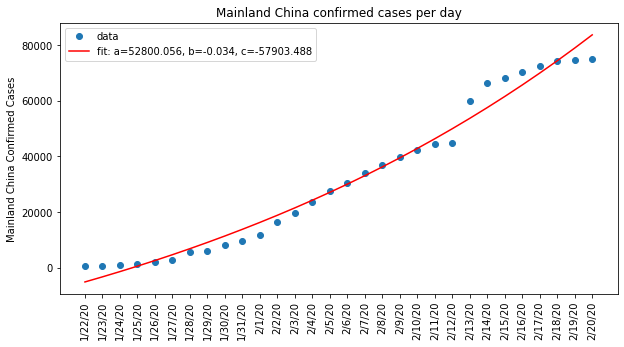

Prediction (exponential):
02/21/20: 88,581
02/22/20: 93,649
02/23/20: 98,893
02/24/20: 104,318
02/25/20: 109,931
02/26/20: 115,737
02/27/20: 121,745
02/28/20: 127,961
02/29/20: 134,392
03/01/20: 141,045
03/02/20: 147,928
03/03/20: 155,050
03/04/20: 162,418
03/05/20: 170,041
03/06/20: 177,927
03/07/20: 186,087
03/08/20: 194,528
03/09/20: 203,262
03/10/20: 212,298
03/11/20: 221,647
03/12/20: 231,319
03/13/20: 241,326
03/14/20: 251,679
03/15/20: 262,390
03/16/20: 273,472
03/17/20: 284,937
03/18/20: 296,799
03/19/20: 309,071
03/20/20: 321,768
03/21/20: 334,904


In [75]:

# Extract start date from data in case this for some reason changes.
sd_str = next(iter(data.keys()))
sd_tkn = sd_str.split('/')
startdate = datetime.date(2000 + int(sd_tkn[2]), int(sd_tkn[0]), int(sd_tkn[1]))
print("Start Date (extracted from data):")
print(startdate.strftime('%m/%d/%y'))
print()
                    
def exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

x=[*data.keys()]
x_enum=[*range(0, len(x))]
y=[*data.values()]

# Exponential curve fit.
popt, pcov = curve_fit(exp, x_enum, y, p0 = (1, 1e-6, 1))

# Sigmoidal curve fit.
# p0_sigmoid = [max(y), np.median(x_enum),1,min(y)] # this is an mandatory initial guess
# popt, pcov = curve_fit(sigmoid, x_enum, y, p0=p0_sigmoid)

print(popt)
print("Curve Fit Covariance:")
print(pcov)

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.plot(x, y, 'o', label='data')

# Plot exponential fit.
plt.plot(x, [exp(xp, *popt) for xp in x_enum], 'r-',
        label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Plot sigmoidal fit.
# plt.plot(x, [sigmoid(xp, *popt) for xp in x_enum], 'r-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.title("Mainland China confirmed cases per day")
plt.legend()
plt.ylabel("Mainland China Confirmed Cases")
plt.show()

print("Prediction (exponential):")
for day_index in range(len(x), len(x)+30):
    day = (startdate + datetime.timedelta(days=day_index)).strftime('%m/%d/%y')
    count = exp(day_index, *popt)
    print(f"{day}: {int(count):,d}")

You can see that the head of the trend is matched well in exponential model, but the tail is not perfect matched. I guess in the future, the sigmoid model will be a good match. But we need more data and time to see if it fits well. 

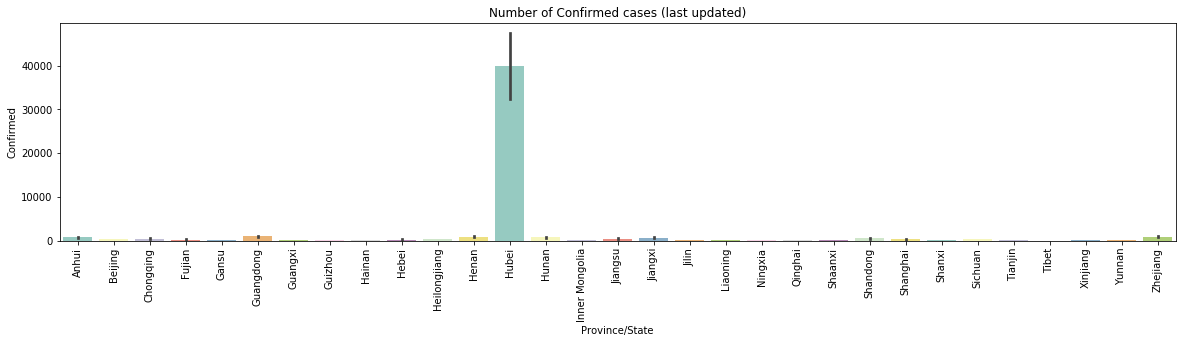

In [61]:
# Some function may be used later
def plot_count(feature, value, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    g = sns.barplot(df[feature], df[value],  palette='Set3')
    g.set_title("Number of {}".format(title))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()    

datac = data1.loc[data1['Country/Region']=="Mainland China"]
datac = datac.sort_values(by = ['Province/State','Last Update'])
# filtered_data_last = datac.drop_duplicates(subset = ['Province/State'],keep='first')
plot_count('Province/State', 'Confirmed', 'Confirmed cases (last updated)', datac, size=5)

Here we have a look at confirmed case count. The number Hubei's confirmed case is dominated. If we need to see other provinces' case clearly, see below.

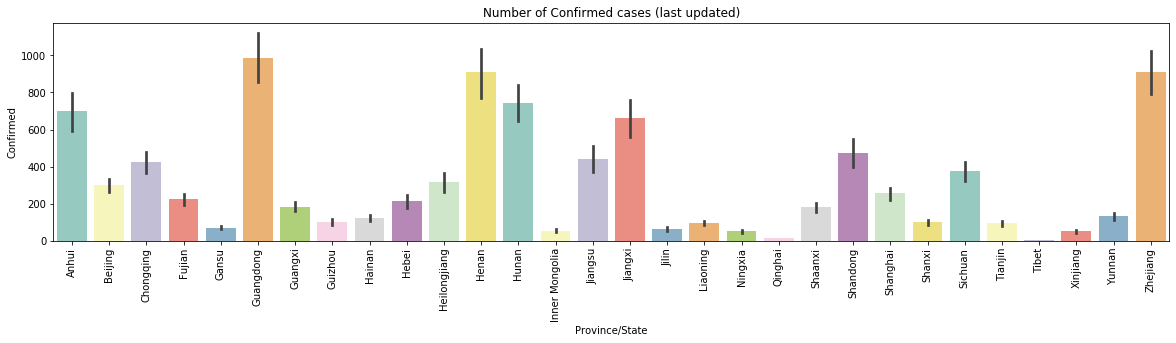

In [66]:
datac_noHubei = datac.loc[data1['Province/State']!="Hubei"]
datac_noHubei = datac_noHubei.sort_values(by = ['Province/State','Last Update'])
# filtered_data_last = datac.drop_duplicates(subset = ['Province/State'],keep='first')
plot_count('Province/State', 'Confirmed', 'Confirmed cases (last updated)', datac_noHubei, size=5)

### Since death and recovered cases are proportional to the confirmed case, we won't show them all.

Death/Recovered Rate in Mainland China


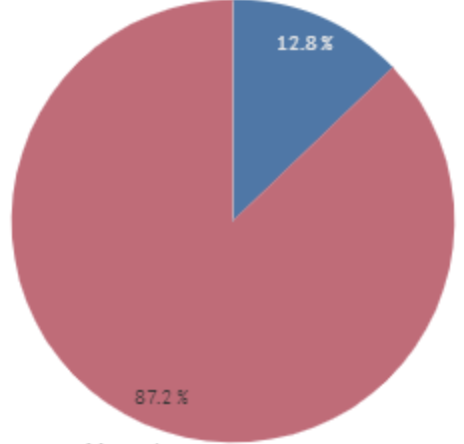

In [100]:
import plotly.graph_objs as go

colors = ['purplered', 'blue']
columns = list(datac_noHubei.iloc[:,1:3])
values = datac_noHubei.iloc[:,1:3].values.tolist()[0]

fig = go.Figure(data=[go.Pie(labels=columns, 
                             values=values , hole=.3)]
               )

fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2))
                 )

# fig.update_layout(
#     title_text="Death/Recovered Rate in Mainland China", height=500, width=700, showlegend=False)
print("Death/Recovered Rate in Mainland China")
fig.show()

### You can see that the death/recover rate is about 1:7.

## Now analyze the case outside Mainland China.

In [43]:
data = {}
header = []

with open('./novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    header = next(plots)
    for date in header[4:]:
        data[date] = 0
    #print(data)
    for row in plots:
        if row[1].strip() != 'Mainland China':
            for i in range(4, len(row)):
                #print(header[i], int(row[i]))
                try:
                    data[header[i]] += int(row[i])
                except:
                    print("No data entered at:", row[0], ", col:", i)
                    
print("Raw Data (aggregated outside Mainland China confirmed cases per day):\n")
print(data)

Raw Data (aggregated outside Mainland China confirmed cases per day):

{'1/22/20': 8, '1/23/20': 14, '1/24/20': 25, '1/25/20': 35, '1/26/20': 56, '1/27/20': 64, '1/28/20': 84, '1/29/20': 96, '1/30/20': 110, '1/31/20': 144, '2/1/20': 167, '2/2/20': 180, '2/3/20': 188, '2/4/20': 212, '2/5/20': 227, '2/6/20': 265, '2/7/20': 317, '2/8/20': 343, '2/9/20': 361, '2/10/20': 457, '2/11/20': 476, '2/12/20': 523, '2/13/20': 538, '2/14/20': 595, '2/15/20': 685, '2/16/20': 780, '2/17/20': 896, '2/18/20': 999, '2/19/20': 1095, '2/20/20': 1200}


Start Date (extracted from data):
01/22/20

Curve Fit Covariance:
[[ 5.09330248e+01  2.32902894e-02 -9.17216841e+01]
 [ 2.32902894e-02  1.07726698e-05 -4.08575243e-02]
 [-9.17216841e+01 -4.08575243e-02  1.87370946e+02]]


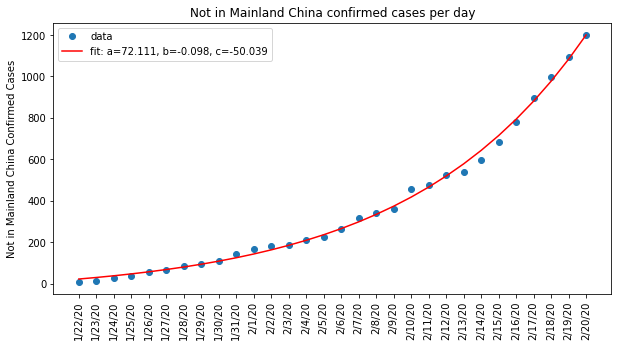

Prediction (exponential):
02/21/20: 1,328
02/22/20: 1,471
02/23/20: 1,628
02/24/20: 1,801
02/25/20: 1,993
02/26/20: 2,204
02/27/20: 2,437
02/28/20: 2,694
02/29/20: 2,978
03/01/20: 3,290
03/02/20: 3,636
03/03/20: 4,017
03/04/20: 4,437
03/05/20: 4,901
03/06/20: 5,413
03/07/20: 5,977
03/08/20: 6,600
03/09/20: 7,288
03/10/20: 8,046
03/11/20: 8,883
03/12/20: 9,806
03/13/20: 10,825
03/14/20: 11,949
03/15/20: 13,189
03/16/20: 14,558
03/17/20: 16,067
03/18/20: 17,733
03/19/20: 19,571
03/20/20: 21,599
03/21/20: 23,837


In [44]:
# Extract start date from data in case this for some reason changes.
sd_str = next(iter(data.keys()))
sd_tkn = sd_str.split('/')
startdate = datetime.date(2000 + int(sd_tkn[2]), int(sd_tkn[0]), int(sd_tkn[1]))
print("Start Date (extracted from data):")
print(startdate.strftime('%m/%d/%y'))
print()
                    
def exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

x=[*data.keys()]
x_enum=[*range(0, len(x))]
y=[*data.values()]

# Exponential curve fit.
popt, pcov = curve_fit(exp, x_enum, y, p0 = (1, 1e-6, 1))

# Sigmoidal curve fit.
# p0_sigmoid = [max(y), np.median(x_enum),1,min(y)] # this is an mandatory initial guess
# popt, pcov = curve_fit(sigmoid, x_enum, y, p0=p0_sigmoid)

#print(popt)
print("Curve Fit Covariance:")
print(pcov)

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.plot(x, y, 'o', label='data')

# Plot exponential fit.
plt.plot(x, [exp(xp, *popt) for xp in x_enum], 'r-',
        label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Plot sigmoidal fit.
# plt.plot(x, [sigmoid(xp, *popt) for xp in x_enum], 'r-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.title("Not in Mainland China confirmed cases per day")
plt.legend()
plt.ylabel("Not in Mainland China Confirmed Cases")
plt.show()

print("Prediction (exponential):")
for day_index in range(len(x), len(x)+30):
    day = (startdate + datetime.timedelta(days=day_index)).strftime('%m/%d/%y')
    count = exp(day_index, *popt)
    print(f"{day}: {int(count):,d}")

We can see that exponential model is perfectly matched.